# K-Means Clustering with Python
Facebook Live sellers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Live.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [5]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [6]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [7]:
len(df['status_id'].unique())

6997

In [8]:
len(df['status_published'].unique())

6913

In [9]:
len(df['status_type'].unique())

4

In [10]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [11]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['status_type'] = le.fit_transform(df['status_type'])

In [14]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


In [15]:
ms = MinMaxScaler()
df_scalar=pd.DataFrame(ms.fit_transform(df), columns=df.columns)
df_scalar

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
7045,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.333333,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


In [16]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(df_scalar)
    sse.append(km.inertia_)
sse    

[899.1609334281574,
 240.06686397262814,
 178.66340039279407,
 130.3325194711556,
 96.24993195940584,
 89.04238066559026,
 75.84694032787743,
 68.59327636689252,
 65.05938647393846]

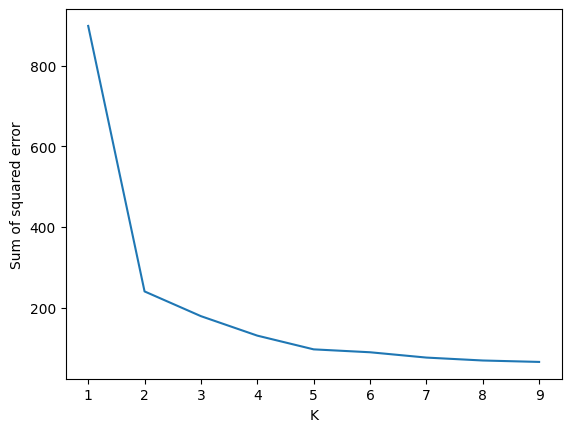

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [18]:
km = KMeans(n_clusters=4)
km.fit(df_scalar)

KMeans(n_clusters=4)

In [19]:
labels = km.labels_
labels

array([3, 1, 3, ..., 1, 1, 1])

In [20]:
df_scalar['cluster']=labels
df_scalar

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,3
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,3
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,1
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
7045,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,1
7046,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,1
7047,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,1
7048,0.333333,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,1


In [21]:
km.cluster_centers_

array([[1.00000000e+00, 3.15705918e-01, 1.07732325e-01, 1.32386524e-01,
        2.76566484e-01, 2.31209319e-01, 7.70760276e-02, 5.15955574e-02,
        3.20228594e-02, 4.06873075e-02],
       [3.29212121e-01, 1.92465805e-02, 6.48839996e-04, 5.26196545e-04,
        1.87796950e-02, 1.92721738e-03, 1.99520384e-03, 1.16116580e-03,
        2.85204991e-03, 1.52492669e-03],
       [4.07407407e-01, 3.78792862e-01, 3.04362177e-03, 4.15082310e-03,
        3.77269889e-01, 5.86942032e-03, 1.08854093e-02, 1.47787353e-03,
        1.02524670e-03, 2.10837023e-04],
       [9.60743802e-01, 3.56672106e-02, 2.07887857e-02, 2.17440575e-02,
        3.05505255e-02, 3.34006315e-02, 2.39609965e-03, 6.51418645e-03,
        6.29557608e-03, 4.66542255e-03]])

In [22]:
#sns.pairplot(df_scalar, hue= 'cluster', palette='viridis')
#plt.show()

In [23]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_scalar, km.labels_)
print(f"Silhouette Score for 3 clusters: {silhouette_avg}")

Silhouette Score for 3 clusters: 0.9065825587273919


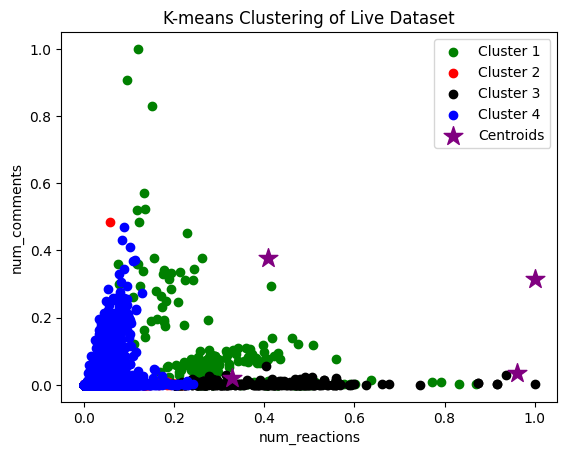

In [24]:
df1 = df_scalar[df_scalar.cluster == 0]
df2 = df_scalar[df_scalar.cluster == 1]
df3 = df_scalar[df_scalar.cluster == 2]
df4 = df_scalar[df_scalar.cluster == 3]

# Scatter plot for each cluster
plt.scatter(df1['num_reactions'], df1['num_comments'], color='green', label='Cluster 1')
plt.scatter(df2['num_reactions'], df2['num_comments'], color='red', label='Cluster 2')
plt.scatter(df3['num_reactions'], df3['num_comments'], color='black', label='Cluster 3')
plt.scatter(df4['num_reactions'], df4['num_comments'], color='blue', label='Cluster 4')

# Plotting the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', s=200, label='Centroids')

# Labels and legend
plt.xlabel('num_reactions')
plt.ylabel('num_comments')
plt.legend()
plt.title('K-means Clustering of Live Dataset')
plt.show()